# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

In [1]:
# Install required packages
%pip install --upgrade pandas numpy matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 24.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 20.7 MB/s eta 0:00:0000:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:━━━━━━━━━━━━━━━━━━━ 0/3 [numpy]
      Successfully uninstalled numpy-2.3.1━━━━━━ 0/3 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/3 [numpy]  WARNING: The scripts f2py and numpy-config are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: pandas━━━━━━━━━━━━━━━━━━ 0/3 [numpy]
    Found existing installation: pandas 2.3.1 0/3 [numpy]
    Uninstalling pandas-2.3.1:╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [pandas]
      Successfully uninstalled pandas-2.3.1━━━━━━━━━━━━━━━━━━━ 1/3 [pandas]

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("Dataset created successfully!")

# Display first few rows
df.head()

Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [5]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


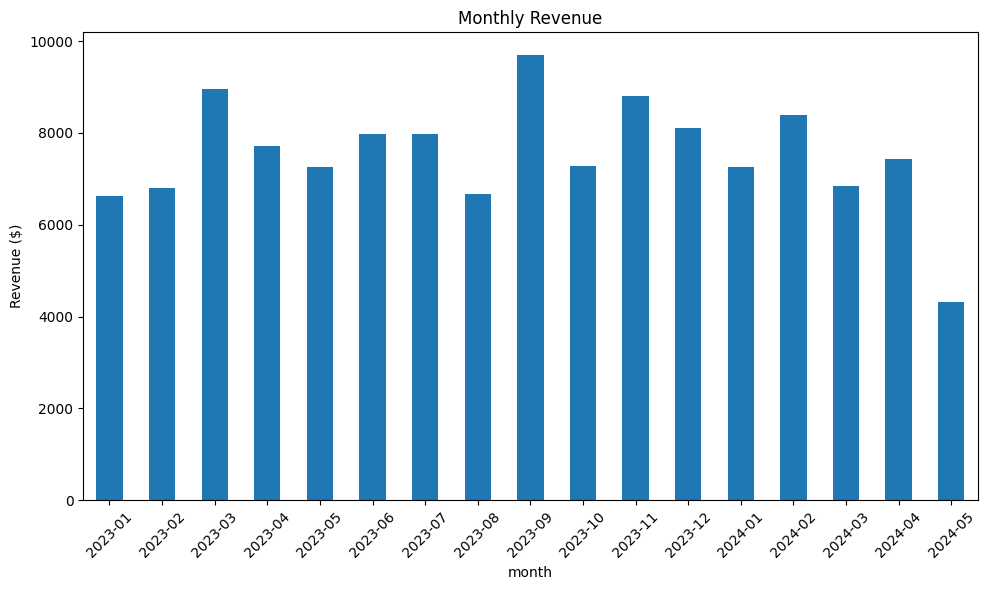

In [6]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [10]:
# Your code here
print(f'Total revenue was {sum(data['revenue'])}')
rbm = data.groupby('month')['revenue'].sum()
rbm


Total revenue was 128140.67


month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [14]:
# Your code here
highest_customer = data.groupby('customer_id')['revenue'].sum()
highest_customer.sort_values(ascending=False, inplace= True)
highest_customer

customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
       ...   
83     254.86
50     242.88
91     198.20
74     195.54
31     124.78
Name: revenue, Length: 99, dtype: float64

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [16]:
# Your code here
cus_seg = data.groupby('customer_segment')['revenue'].mean()
cus_seg.sort_values(ascending=False, inplace = True)
cus_seg

customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [25]:
# Your code here
data
region = data.groupby('region').agg(
    Highest_Revenue = ('revenue', 'sum'),
    avg_quantity = ('quantity', 'mean')
    )

highest_revenue_region = region["Highest_Revenue"].idxmax()
highest_avg_quantity = region["avg_quantity"].idxmax()

print(f'Highest Revenue region: {highest_revenue_region}')
print(f"Highest Average Quantity: {highest_avg_quantity}")


Highest Revenue region: South
Highest Average Quantity: West


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [36]:
# Your code here
data
pcquant = data.groupby('product_category').agg(
    byquant = ('quantity', 'sum'),
    byreven = ('revenue', 'sum')
)
print(f"Most popular category: {pcquant['byquant'].idxmax()}")
print(f"Most popular category: {pcquant['byreven'].idxmax()}")

Most popular category: Home
Most popular category: Home


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [ ]:
# Your code here
data['discounted'] = np.where(data['discount_applied'] > 0, 1, 0)
dorder = data.groupby('discounted')['revenue'].mean()
dorder
# 0 -> no discount, 1-> discount


discounted
0    248.296337
1    263.831362
Name: revenue, dtype: float64

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [ ]:
# Your code here
pm = data['payment_method'].value_counts(normalize=True) * 100
pm

pmscore = data.groupby('payment_method').agg(
    avg_spend = ('revenue', 'mean'),
    total_spend = ('revenue', 'sum')
)
print(pm)
pmscore
# In total spend, there is a correlation; in avg_spend not as clear 

payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64


,avg_spend,total_spend
payment_method,,
Credit Card,257.444234,35269.86
Debit Card,275.980650,33945.62
Gift Card,254.362500,31540.95
PayPal,236.071034,27384.24


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

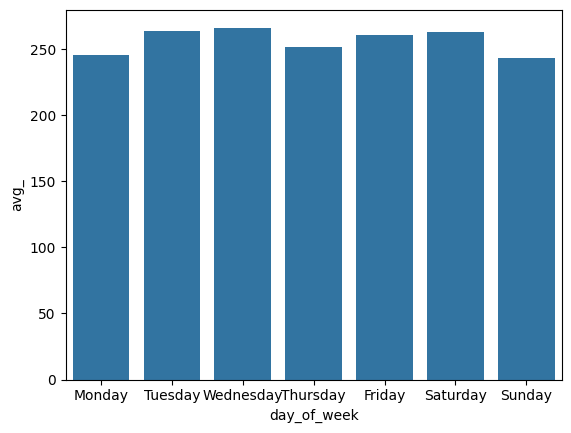

In [60]:
# Your code here
week = data.groupby('day_of_week').agg(
    avg_ = ('revenue', 'mean'),
    sum_ = ('revenue', 'sum')
)
week.reset_index(inplace=True)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

week['day_of_week'] = pd.Categorical(
    week['day_of_week'],
    categories=day_order,
    ordered=True
)
week = week.sort_values('day_of_week')
sns.barplot(x = 'day_of_week', y = 'avg_', data = week);


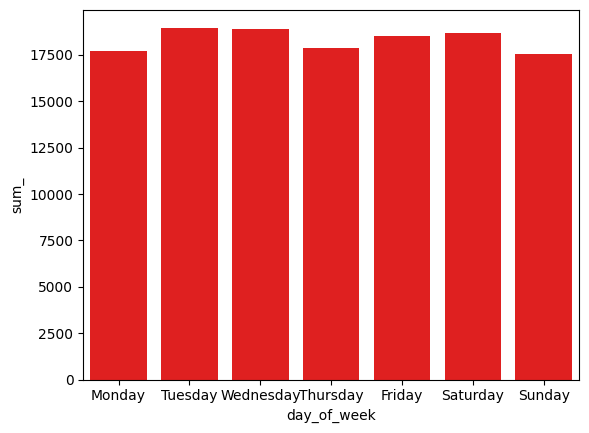

In [61]:
sns.barplot(x = 'day_of_week', y = 'sum_', data = week, color='red');

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [63]:
# Your code here
total_profit = 0.2 * sum(data['revenue'])
print(f'Total Profit: {total_profit}')

data['profit'] = data['revenue'] * 0.2
regional_profit = data.groupby('region')['profit'].sum().sort_values(ascending=False)

print("\nProfit by Region:")
print(regional_profit)


Total Profit: 25628.134000000002

Profit by Region:
region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

The following analysis shows where the most profitability has come from. It'd be wise to look into why there's such a gap between West and South (~$1400) and if that can be worked on. Alternatively, we can work to market to our top performers, which tended to be in the South or seniors or on discounted items (additional analysis can be done to see if there's a correlation between all three).

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.